# Линейная регрессия: 
# Зависимость цены от переменных "общая площадь", "жилая площадь", "площадь кухни"

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv('/content/nedvig_1room_data.csv', delimiter=';')
df.head()

,Square,Square_living,Square_kitchen,Price
0,40.0,20.0,10.0,1596.0
1,37.0,17.0,8.0,1344.0
2,38.0,18.0,9.0,1148.0
3,27.0,14.0,6.0,686.0
4,30.0,17.0,6.0,1008.0


In [144]:
df.describe()

,Square,Square_living,Square_kitchen,Price
count,355.000000,355.000000,355.000000,355.000000
mean,54.280282,31.460563,9.486197,1630.456051
std,17.114759,13.025500,2.878413,493.875473
min,23.000000,8.000000,5.000000,594.000000
25%,40.000000,20.000000,7.000000,1298.000000
50%,52.000000,30.000000,9.000000,1512.000000
75%,68.000000,42.000000,11.000000,1944.000000
max,103.000000,72.000000,19.000000,3250.800000


In [0]:
Y = df['Price']
X = df[['Square', 'Square_living', 'Square_kitchen']]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [33]:
lin_reg = LinearRegression(fit_intercept=True, normalize=True)
lin_reg.fit(X_train, Y_train)
Y_pred = lin_reg.predict(X_test)

print(f'Коэффициенты: {lin_reg.coef_}, {lin_reg.intercept_}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(Y_test, Y_pred)}')
print(f'Коэффициент детерминации: {r2_score(Y_test, Y_pred)}')

S, Sl, Sk = lin_reg.coef_
b = lin_reg.intercept_

Коэффициенты: [10.95289607 15.84485078 10.05297057], 446.23445509615476
Средняя абсолютная ошибка: 206.9241606444827
Коэффициент детерминации: 0.7156825592194714


# Выражение регрессии: 
**Price = 446.235 + 10.953S + 15.845Sl + 10.053Sk**,

где:
  Price - цена

  S - Общая площадь

  Sl - Жилая площадь

  Sk - площадь кухни
  


# Визуализация 

In [123]:
lin_y_pred = 446.235 + 10.953*df['Square'] + 15.845*df['Square_living'] + 10.053*df['Square_kitchen']
lin_y = df['Price'].to_numpy()
lin_y.size

355

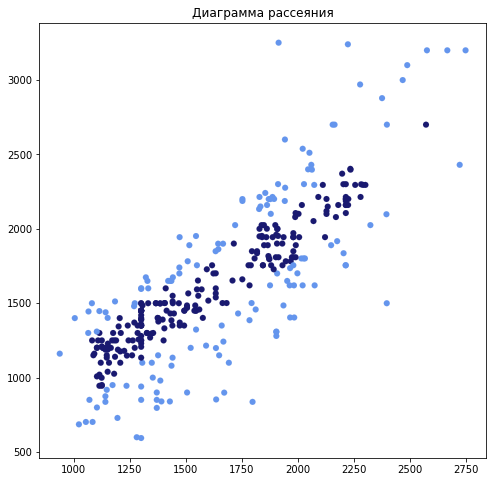

In [143]:
col = np.empty_like(lin_y_pred)
right_points = (abs(lin_y_pred - lin_y) < 200)    
points = (abs(lin_y_pred - lin_y) > 200)

col[right_points] = 1
col[points] = 0
colors = ['midnightblue' if i == 1.0 else 'cornflowerblue' for i in col]


plt.figure(figsize=(8,8))
scatter = plt.scatter(lin_y_pred, lin_y, c=colors, linewidth=0.1)
plt.title('Диаграмма рассеяния')
plt.show()